In [1]:
import numpy as np

# Exercise 7
## 1
Implement simulated annealing for the travelling salesman. As
proposal, permute two random stations on the route. As
cooling scheme, you can use e.g. Tk = 1/
√
1 + k. or
Tk = − log(k + 1), feel free to experiment with different
choices. The route must end where it started. Initialise with a
random permutation of stations
### a)
Have input be positions in the plane of the n stations.
Let the cost of going i 7→ j be the Euclidian distance
between station i and j.
Plot the resulting route in the plane.
Debug with stations on a circle.

In [49]:

def traveling_salesman(cost, maxiter = 10000):
    n = len(cost)
    #random permutation of the first n integers
    X = np.random.permutation(n)
    U = lambda x : np.sum([cost[x[i], x[i+1]] for i in range(n-1)]) + cost[x[n-1], x[0]]
    T = lambda x : 1/np.sqrt(1+x) #-np.log(k + 1)
    f = lambda x,T_k : np.exp(-U(x)/T_k)
    for k in range(maxiter):
        T_k = T(k)
        i,j = np.random.randint(0,n, size = 2)
        Y = np.copy(X)
        #swap two elements of Y
        Y[i], Y[j] = Y[j], Y[i]
        if f(Y,T_k) > f(X,T_k):
            X = Y
    return X

In [52]:
#create 20 points from the circumference on unit circle
n = 20
points = np.array([[np.cos(theta), np.sin(theta)] for theta in np.linspace(0, 2*np.pi, n)])
#create cost matrix corresponding the distance between each pair of points
cost = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        cost[i,j] = np.linalg.norm(points[i]-points[j])
#heatmap of cost matrix
X = traveling_salesman(cost)

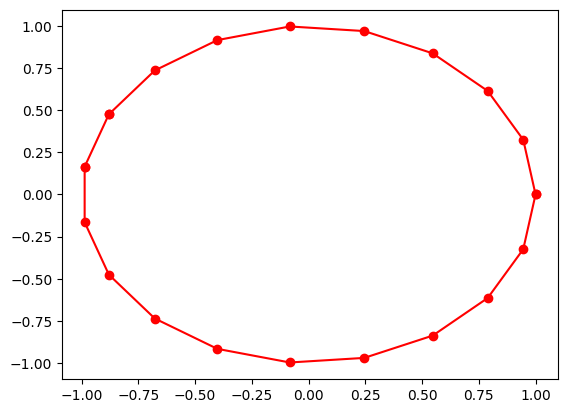

In [53]:
#plot solution of traveling salesman problem
import matplotlib.pyplot as plt
plt.plot(points[X,0], points[X,1], 'ro-')
plt.plot(points[[X[-1],X[0]],0], points[[X[-1],X[0]],1], 'ro-')
plt.show()

### b)
Then modify your progamme to work with costs directly
and apply it to the cost matrix from the course homepage

In [54]:
#import csv file and convert to numpy array
cost = np.genfromtxt('Exercises/cost.csv', delimiter=',', skip_header=0)
X = traveling_salesman(cost)
print(X)

[ 1  6 10  8 13  3  4 19 15  0 16 14  2 12 17  9  7 11  5 18]
